<a href="https://colab.research.google.com/github/jorgetapia-ml/sintomas_no_motores_vs_motores_parkinson/blob/develop/Avance3_11Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Grettel Barceló Alonso

## **Avance 3**

###**Ingeniería de características**

* Alejandra Ramírez Romano-A01793144
* Jorge Luis Tapia Peñaloza-A01793013
* Marco Antonio Pérez Castellanos-A01793473


# JUSTIFICACIÓN DEL ALGORITMO BASE

Los algoritmos de agrupación son herramientas esenciales en áreas como el procesamiento de imágenes, la segmentación de clientes, el análisis genético, el análisis de documentos de texto, etc. Su propósito es organizar un conjunto de datos en grupos, de tal manera que los datos dentro de un mismo grupo sean más parecidos entre sí que con los de otros grupos. Normalmente, los conjuntos de datos en la vida real contienen tanto atributos numéricos como categóricos. A pesar de esto, la mayoría de los algoritmos de agrupación actuales están diseñados para trabajar con atributos que son exclusivamente numéricos o categóricos, como es el caso de los algoritmos k-means, k-modes, fuzzy k-modes, TGCA, COOLCAT, G-ANMI, etc. Cuando se trabaja con datos mixtos, estos algoritmos suelen recurrir a métodos de transformación para convertir un tipo de atributos en otro, y luego aplican los algoritmos de agrupación tradicionales. Sin embargo, este proceso de transformación puede causar la pérdida de información, lo que puede llevar a resultados de agrupación no satisfactorios. [1]

Se han realizado algunas investigaciones para abordar directamente los datos mixtos. Huang propuso un algoritmo llamado k-prototipos, que combina los métodos de k-means y k-modes para segmentar datos mixtos. Zheng y sus colegas desarrollaron un algoritmo evolutivo de k-prototipos (EKP) [2].

# EL ALGORITMO K-PROTOTYPES

Huang [2] presentó el conocido algoritmo de k-prototipos para agrupar datos mixtos. El objetivo de este algoritmo es dividir el conjunto de datos \( X \) en \( k \) grupos o clusters minimizando la función de coste, que se da de la siguiente manera:

$$
E(U, V) = \sum_{j=1}^{k} \sum_{i=1}^{n} u_{ij} d(x_i, V_j)
$$

donde \( V_j \) es el centro del cluster o prototipo de un cluster \( j \); \( u_{ij} \) (0 ≤ \( u_{ij} \) ≤ 1) es un elemento de la matriz de pertenencia \( U_{n \times k} \); y \( d(x_i, V_j) \) es la medida de distancia que se formula de la siguiente manera:

$$
d(x_i, V_j) = \sum_{l=1}^{m} d(x_{il}, v_{jl})
$$

El término \( d(x_{il}, v_{jl}) \) en la anterior ecuación está dada como sigue:

$$
d(x_{il}, v_{jl}) =
\begin{cases}
(x_{il} - v_{jl})^2 & \text{Si el atributo } l \text{th es numérico} \\
\beta \theta(x_{il}, v_{jl}) & \text{Si el atributo } l \text{th es categórico}
\end{cases}
$$

donde \( \theta(a, b) = 1 \) si los términos \( a \) y \( b \) tienen valores diferentes, \( \theta(a, b) = 0 \) si los términos \( a \) y \( b \) tienen el mismo valor, y \( \beta_j \) es el peso de los atributos categóricos en un grupo \( j \).

# EL PROCESO DEL ALGORITMO K-PROTOTYPES

**Entrada**: Conjunto de datos \( X \), el número de clusters \( k \), \( \beta_j \).

1. Se eligen \( k \) objetos de datos de manera aleatoria del conjunto de datos \( X \) como los centros de cluster iniciales o prototipos.
2. Para cada objeto de datos en \( X \), se le asigna al cluster cuyo prototipo es el más cercano a este objeto de datos de acuerdo con la Ecuación (2); después de cada asignación, se actualiza el centro del cluster o el prototipo del cluster correspondiente.
3. Se recalcula la similitud entre los objetos de datos y los prototipos después de que todos los objetos de datos hayan sido asignados. Si el prototipo más cercano de un objeto de datos pertenece a otro cluster, se retira este objeto de datos de su cluster actual y se reasigna al más cercano. Se actualizan los prototipos para estos dos clusters.
4. Se repite el Paso 3 hasta que ningún objeto de datos cambie sus clusters.

**Salida**: El resultado del clustering.

En Python, dentro de la librería de Scikit-Learn se encuentra k-prototypes, este algoritmo solo acepta valores floating-point para datos numéricos y valores integer para los datos categóricos.

# MÉTRICAS

Dada la naturaleza de nuestro problema, no buscamos una clasificación que podamos medir, sino que buscamos si existen agrupaciones coherentes. Por ello, utilizaremos métricas que nos proporcionen una consistencia de los clusters y nos ayuden a determinar el número óptimo de clusters. Entre estas métricas se incluyen el coeficiente de silueta y el criterio del codo, que nos permitirán evaluar la calidad de la agrupación y decidir cuántos clusters son necesarios para una segmentación efectiva.

Dentro de la evaluación del modelo incluimos tres scores:

**Silhouette Score:**

* Descripción: Mide cuán similares son los puntos dentro de un mismo cluster (cohesión) en comparación con los puntos de otros clusters (separación).
* Rango: -1 a 1. Un valor cercano a 1 indica clusters bien definidos y separados, 0 indica que los puntos están en el límite de los clusters, y valores negativos indican posible asignación incorrecta de clusters.

**Davies-Bouldin Score:**

* Descripción: Mide la media de las razones de la suma de las distancias intracluster (dentro del mismo cluster) e intercluster (entre diferentes clusters).
* Rango: 0 a ∞. Valores más bajos indican mejor separación y menor dispersión de los clusters.

**Calinski-Harabasz Score:**

* Descripción: Mide la proporción de la suma de la dispersión intracluster (dentro del mismo cluster) a la suma de la dispersión intercluster (entre diferentes clusters).

* Rango: 0 a ∞. Valores más altos indican clusters más densos y bien separados.
Estas métricas ayudan a evaluar la calidad de la clusterización desde diferentes perspectivas: cohesión y separación (Silhouette), separación y dispersión (Davies-Bouldin), y densidad y separación (Calinski-Harabasz).











# REFERENCIAS

[1] Jinchao Ji, Tian Bai, Chunguang Zhou, Chao Ma, Zhe Wang, An improved k-prototypes clustering algorithm for mixed numeric and categorical data - ScienceDirect, 7 April 2013, pp.1  
[2] Z. Huang, ‘‘Clustering large data sets with mixed numeric and categorical values,’’ in Proc. 1st Pacific–Asia Conf. Knowl. Discovery Data Mining, 1997, pp. 21–34.


In [1]:
!pip install -q scikit-learn-extra

In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.table import Table
from datetime import datetime
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from itertools import chain
sns.set_style("whitegrid")
pd.set_option("display.max_columns", 200)

In [4]:
file_path = "/content/drive/MyDrive/Colab Notebooks/data/parkinson_ai.csv"

In [5]:
try:
    data = pd.read_csv(file_path, sep="|")
except Exception as e:
    print("Error al cargar el archivo:", e)

In [6]:
#Definir un diccionario llamado updrs que contiene tres claves: “UPDRS1”, “UPDRS2” y “UPDRS3”.
updrs = {"UPDRS1": ["Estado mental (p. ej., claridad, atención y memoria).",
                    "Estado de ánimo y comportamiento (p. ej., depresión, motivación).",
                    "Actividad del día a día y comportamiento.", "Motivación/Iniciativa.", "Apatia",
                    "Control de emocional", "Problema de sueño", "Somnolencia diurna"],
          "UPDRS2": ["Problemas para hablar", "Exceso de saliva", "Dificultades para tragar y comer", "Manejo de alimentos y cubiertos complicado",
                      "Problemas para vestirse", "Ayuda necesaria en higiene personal", "Dificultad en la escritura", "Problemas para realizar hobbies",
                      "Dificultades para moverse en la cama", "Presencia de temblor", "Dificultades para levantarse", "Problemas con marcha y equilibrio", "Congelación al caminar"],
          "UPDRS3": ["Lenguaje", "Expresión facial", "Rigidez - Cuello", "Rigidez - MSD", "Rigidez - MSI", "Rigidez - MID", "Rigidez - MII", "Golpeteo de dedos (tapping) - Mano derecha",
                     "Golpeteo de dedos (tapping) - Mano izquierda", "Movimientos de las manos - Mano derecha", "Movimientos de las manos - Mano izquierda", "Pronación-supinación - Mano derecha",
                     "Pronación-supinación - Mano izquierda", "Golpeteo con los dedos de los pies - Pie derecho", "Golpeteo con los dedos de los pies - Pie izquierdo",
                     "Agilidad con las piernas - Pierna derecha", "Agilidad con las piernas - Pierna izquierda", "Levantarse de la silla", "Marcha", "Congelación de la marcha", "Estabilidad postural",
                     "Postura", "Espontaneidad global de movimientos", "Temblor postural - Mano derecha", "Temblor postural - Mano izquierda",
                     "Temblor de acción - Mano derecha", "Temblor de acción - Mano izquierda", "Amplitud del temblor de reposo - MSD", "Amplitud del temblor de reposo - MSI",
                     "Amplitud del temblor de reposo - MID", "Amplitud del temblor de reposo - MII", "Amplitud del temblor de reposo - Labio/mandíbula", "Persistencia del temblor de reposo"]
                }

In [7]:
# Filtrar el diccionario updrs para mantener solo aquellos elementos cuyos valores están presentes en las columnas del DataFrame data
updrs = {k: [filter_v for filter_v in v if filter_v in data.columns] for k,v in updrs.items()}

In [8]:
# Aplanar las listas de valores en el diccionario updrs en una sola lista
all_updrs = list(chain.from_iterable(updrs.values()))

In [9]:
# Eliminar cualquier fila en el DataFrame data que tenga algún valor nulo (NaN) en las columnas especificadas en all_updrs
data.dropna(subset = all_updrs, how="any", inplace=True)

In [10]:
# Devolver la forma del DataFrame data después de eliminar las filas con valores nulos
data.shape

(220, 78)

In [11]:
# Crear una copia del DataFrame data que contiene solo las columnas especificadas en all_updrs
X = data[all_updrs].copy()

In [12]:
# Crear un pipeline de preprocesamiento que primero estandariza los datos y luego aplica PCA con 4 componentes
n_components = 4
pipeline_pc = Pipeline(steps=[("standard", StandardScaler()), ("pca", PCA(n_components=n_components))])

Transformamos los datos usando PCA y almacenamos los componentes principales en un DataFrame. Primero, aplicamos el pipeline de PCA a los datos X y luego convertimos los resultados en un DataFrame, asignando nombres de columnas como p_0, p_1, etc., según el número de componentes principales especificado, y manteniendo los mismos índices que los datos originales.

In [13]:
#Ajustar y transformar el DataFrame X utilizando el pipeline de preprocesamiento "pipeline_pc" definido anteriormente.
X_pca = pd.DataFrame(pipeline_pc.fit_transform(X), columns=[f"p_{i}" for i in range(n_components)], index=X.index)

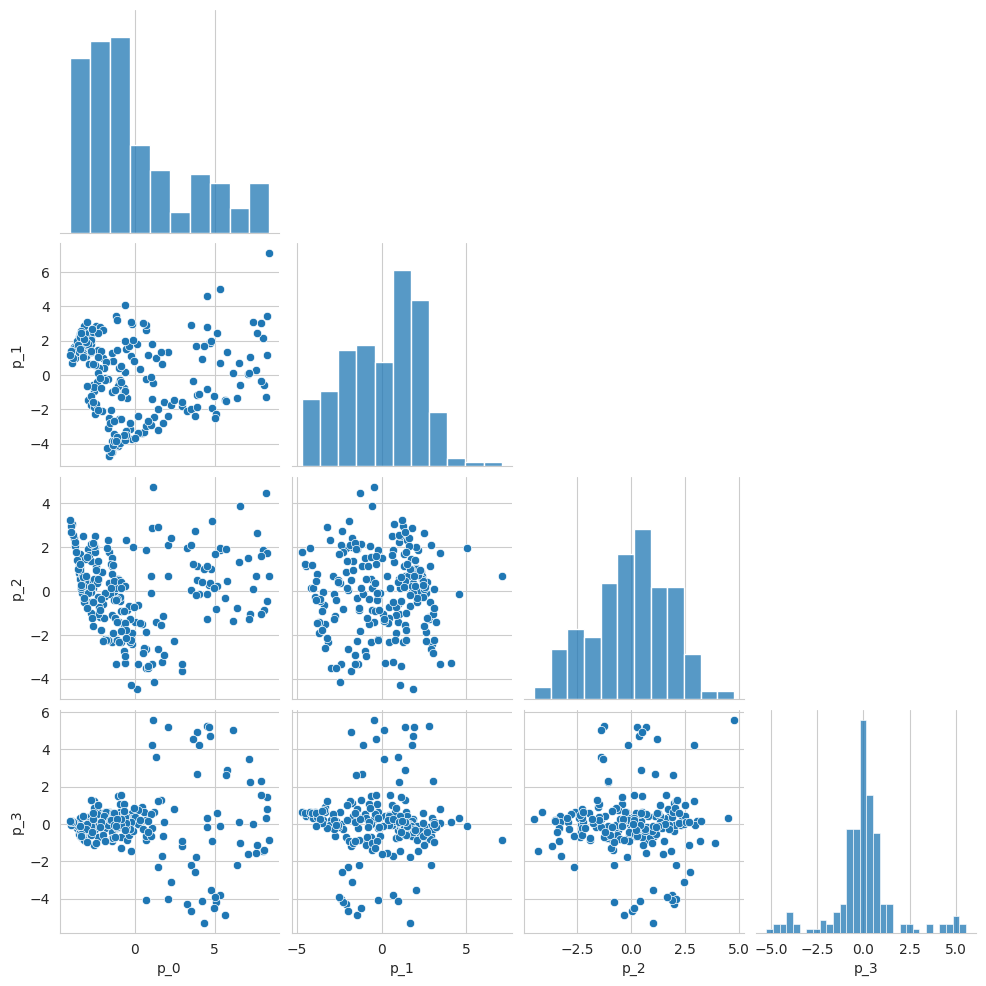

In [14]:
#Generar un grafico de pares
sns.pairplot(X_pca, corner=True);

In [15]:
#Crear un nuevo DataFrame "X_to_cluster" que contiene solo las columnas definidas en all_updrs
X_to_cluster = X[all_updrs].copy()

Esta función calcula el costo de un modelo de agrupamiento dado. El costo se define como la suma de las distancias al cuadrado de cada punto de datos a su centroide más cercano.

In [16]:
def calculate_cost(model, data):
    return model.inertia_

#Ajustar modelo KMedoids para cada valor de k, calcular el costo y el puntaje de silueta, y agregarlos a las listas: costs y silhouette_scores
costs = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(X_to_cluster)
    costs.append(calculate_cost(kmedoids, X_to_cluster))
    silhouette_scores.append(silhouette_score(X_to_cluster, kmedoids.labels_))


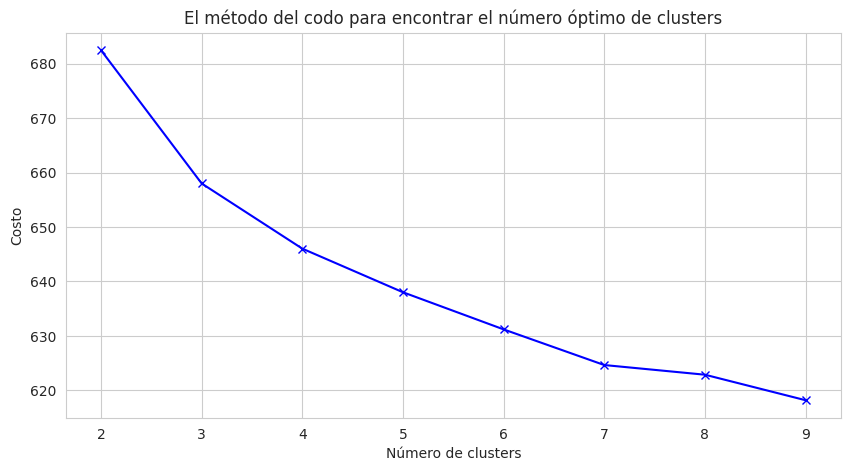

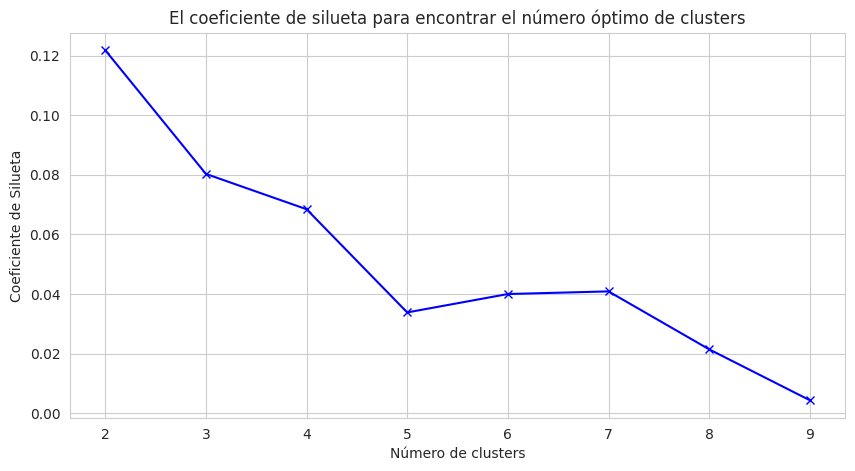

In [17]:
#Determinar el número óptimo de clusters
plt.figure(figsize=(10, 5))
plt.plot(K, costs, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Costo')
plt.title('El método del codo para encontrar el número óptimo de clusters')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('El coeficiente de silueta para encontrar el número óptimo de clusters')
plt.show()


In [18]:
#Realizar agrupamiento KMedoids en los datos en "X_to_cluster" y añadir las etiquetas de cluster a los datos originales
num_clusters = 3
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)

clusters = kmedoids.fit_predict(X_to_cluster)

X_to_cluster['Cluster'] = clusters

Segmentamos los datos en 3 clusters utilizando el algoritmo K-Medoids. Primero, definimos el número de clusters a 3 y creamos una instancia del modelo K-Medoids con esta configuración y una semilla aleatoria para reproducibilidad. Luego, ajustamos el modelo a los datos X_to_cluster y asignamos cada punto a un cluster, almacenando las etiquetas de cluster en clusters. Finalmente, añadimos una nueva columna 'Cluster' a los datos originales X_to_cluster, indicando el cluster asignado a cada punto de datos.

A diferencia de Kmeans, KMedoids selecciona un punto de datos real de cada cluster como el medoide (el punto más representativo del cluster)

In [19]:
#Calcular la media de cada característica para cada cluster
X_to_cluster.groupby("Cluster").mean()

,"Estado mental (p. ej., claridad, atención y memoria).","Estado de ánimo y comportamiento (p. ej., depresión, motivación).",Actividad del día a día y comportamiento.,Motivación/Iniciativa.,Apatia,Control de emocional,Problema de sueño,Somnolencia diurna,Presencia de temblor,Dificultades para levantarse,Problemas con marcha y equilibrio,Congelación al caminar,Lenguaje,Expresión facial,Rigidez - Cuello,Rigidez - MSD,Rigidez - MSI,Rigidez - MID,Rigidez - MII,Golpeteo de dedos (tapping) - Mano derecha,Golpeteo de dedos (tapping) - Mano izquierda,Movimientos de las manos - Mano derecha,Movimientos de las manos - Mano izquierda,Pronación-supinación - Mano derecha,Pronación-supinación - Mano izquierda,Golpeteo con los dedos de los pies - Pie derecho,Golpeteo con los dedos de los pies - Pie izquierdo,Agilidad con las piernas - Pierna derecha,Agilidad con las piernas - Pierna izquierda,Levantarse de la silla,Marcha,Congelación de la marcha,Estabilidad postural,Postura,Espontaneidad global de movimientos,Temblor postural - Mano derecha,Temblor postural - Mano izquierda,Temblor de acción - Mano derecha,Temblor de acción - Mano izquierda,Amplitud del temblor de reposo - MSD,Amplitud del temblor de reposo - MSI,Amplitud del temblor de reposo - MID,Amplitud del temblor de reposo - MII,Amplitud del temblor de reposo - Labio/mandíbula,Persistencia del temblor de reposo
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.577465,0.267606,0.816901,0.788732,0.619718,0.253521,0.732394,0.732394,0.915493,0.845070,0.901408,0.690141,0.718310,0.887324,0.873239,0.929577,0.887324,0.929577,0.873239,0.943662,0.929577,0.915493,0.929577,0.901408,0.929577,0.929577,0.943662,0.887324,0.887324,0.732394,0.915493,0.661972,0.859155,0.816901,0.901408,0.760563,0.830986,0.732394,0.732394,0.873239,0.901408,0.802817,0.845070,0.549296,0.873239
1,0.218182,0.072727,0.090909,0.127273,0.054545,0.109091,0.345455,0.254545,0.818182,0.527273,0.618182,0.400000,0.527273,0.781818,0.672727,0.890909,0.854545,0.818182,0.745455,0.890909,0.854545,0.818182,0.818182,0.854545,0.836364,0.800000,0.836364,0.800000,0.818182,0.600000,0.836364,0.545455,0.763636,0.781818,0.818182,0.763636,0.727273,0.527273,0.563636,0.854545,0.872727,0.636364,0.654545,0.363636,0.672727
2,0.414894,0.202128,0.680851,0.723404,0.510638,0.212766,0.563830,0.691489,0.489362,0.617021,0.723404,0.510638,0.691489,0.840426,0.659574,0.787234,0.755319,0.755319,0.755319,0.787234,0.765957,0.776596,0.755319,0.734043,0.755319,0.776596,0.808511,0.829787,0.755319,0.638298,0.872340,0.585106,0.702128,0.755319,0.787234,0.148936,0.085106,0.127660,0.138298,0.159574,0.095745,0.095745,0.074468,0.074468,0.148936


In [20]:
# Crear tres nuevas columnas en el DataFrame "X_to_cluster" donde se calcula la media de las características correspondientes
X_to_cluster["proporcion_sintomas_no_motores"] = X_to_cluster[updrs["UPDRS1"]].mean(axis=1)
X_to_cluster["proporcion_sintomas_fisicos"] = X_to_cluster[updrs["UPDRS2"]].mean(axis=1)
X_to_cluster["proporcion_sintomas_motores"] = X_to_cluster[updrs["UPDRS3"]].mean(axis=1)

Realizamos el ejercicios de clusterización pero ahora con los componente principales

In [21]:
#Añadir las etiquetas de cluster al DataFrame "X_pca" como una nueva columna llamada “cluster”. Las etiquetas de cluster se obtuvieron de la predicción del modelo KMedoids en el código anterior.
X_pca["cluster"] = clusters

In [22]:
#Agrupar la columna Cluster y calcular la media de las tres columnas mencionadas para cada grupo
X_to_cluster.groupby("Cluster")[["proporcion_sintomas_no_motores", "proporcion_sintomas_fisicos", "proporcion_sintomas_motores"]].mean()

,proporcion_sintomas_no_motores,proporcion_sintomas_fisicos,proporcion_sintomas_motores
Cluster,,,
0,0.598592,0.838028,0.851046
1,0.159091,0.590909,0.745455
2,0.500000,0.585106,0.559961


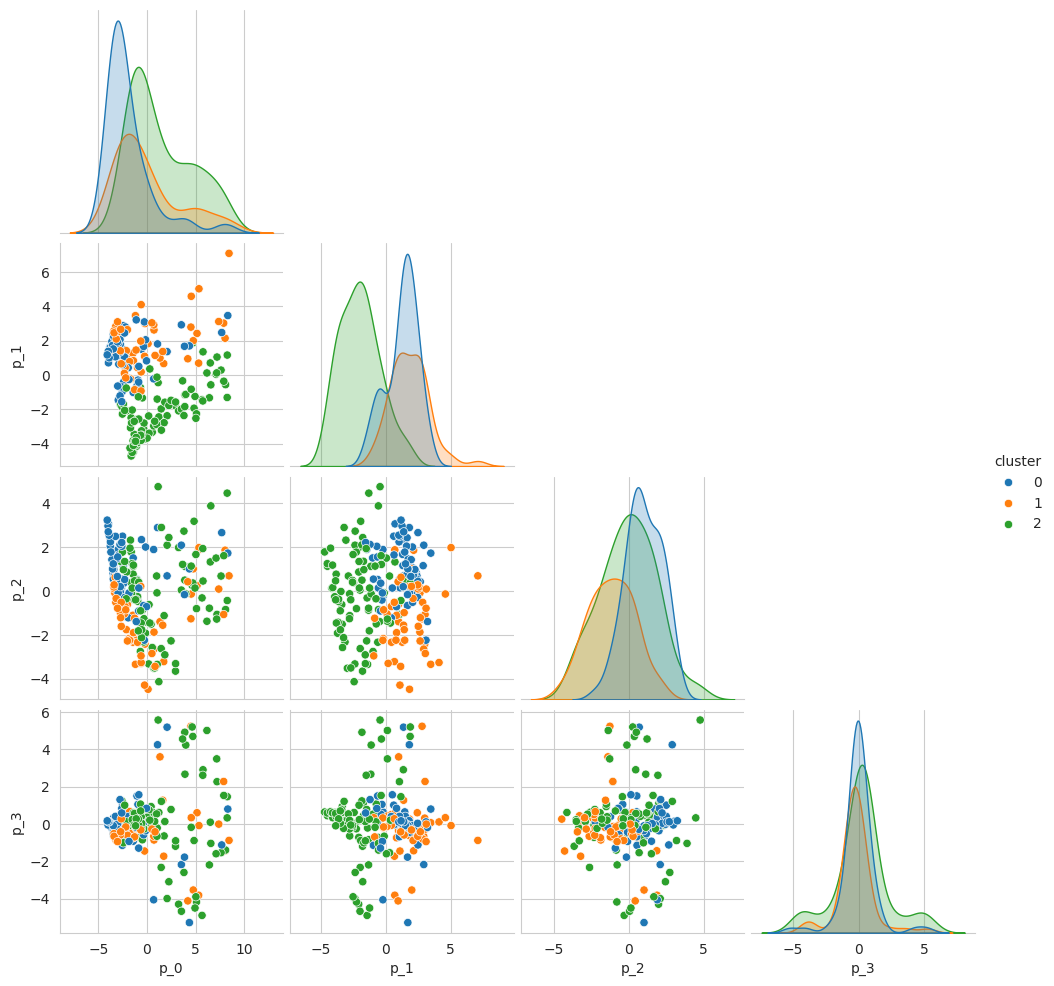

In [23]:
#Generar un grafico de pares con los clusters identificados anteriormente
sns.pairplot(X_pca, corner=True, hue="cluster", palette="tab10");


### Evaluación del Modelo
Evaluaremos la calidad de los clusters usando múltiples métricas como el índice de Silhouette, el coeficiente de Davies-Bouldin y el coeficiente de Calinski-Harabasz.
    

In [24]:
num_clusters = 3
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)

clusters = kmedoids.fit_predict(X_to_cluster)

X_to_cluster['Cluster'] = clusters

In [25]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(X, clusters)

# Calcular el coeficiente de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X, clusters)

# Calcular el coeficiente de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")


Silhouette Score: 0.08019583245319124
Davies-Bouldin Score: 2.899455784086367
Calinski-Harabasz Score: 22.04810892337988


Los resultados obtenidos de las métricas de evaluación indican lo siguiente:

**Silhouette Score (0.0801):**

El índice de Silhouette varía entre -1 y 1. Un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus clusters y que los clusters están bien separados entre sí. Un valor cercano a 0 indica que los puntos están en el límite de los clusters, y un valor negativo indica que los puntos podrían estar agrupados en el cluster incorrecto.
Un Silhouette Score de 0.0801 sugiere que los clusters están muy cerca unos de otros o que los puntos dentro de los clusters están dispersos, indicando una clusterización pobre.

**Davies-Bouldin Score (2.899):**

El coeficiente de Davies-Bouldin mide la media de las razones de la suma de las distancias intracluster e intercluster. Un valor más bajo indica una mejor separación entre los clusters.
Un Davies-Bouldin Score de 2.899 es relativamente alto, lo que sugiere que los clusters están muy cerca unos de otros y/o que los puntos dentro de los clusters no están bien agrupados.

**Calinski-Harabasz Score (22.0481):**

El coeficiente de Calinski-Harabasz, también conocido como el índice de varianza de separación, mide la proporción de la suma de la dispersión intracluster y la suma de la dispersión intercluster. Un valor más alto indica mejores resultados.
Un Calinski-Harabasz Score de 22.0481 es relativamente bajo, lo que sugiere que los clusters no están bien definidos.


Dados estos resulatados evaluaremos si existe un mejor desempeño utilizando otro distintos valores de "n" donde "n" es el número de clusters

El número óptimo de clusters según el Silhouette Score es: 2
El número óptimo de clusters según el Davies-Bouldin Score es: 2
El número óptimo de clusters según el Calinski-Harabasz Score es: 2


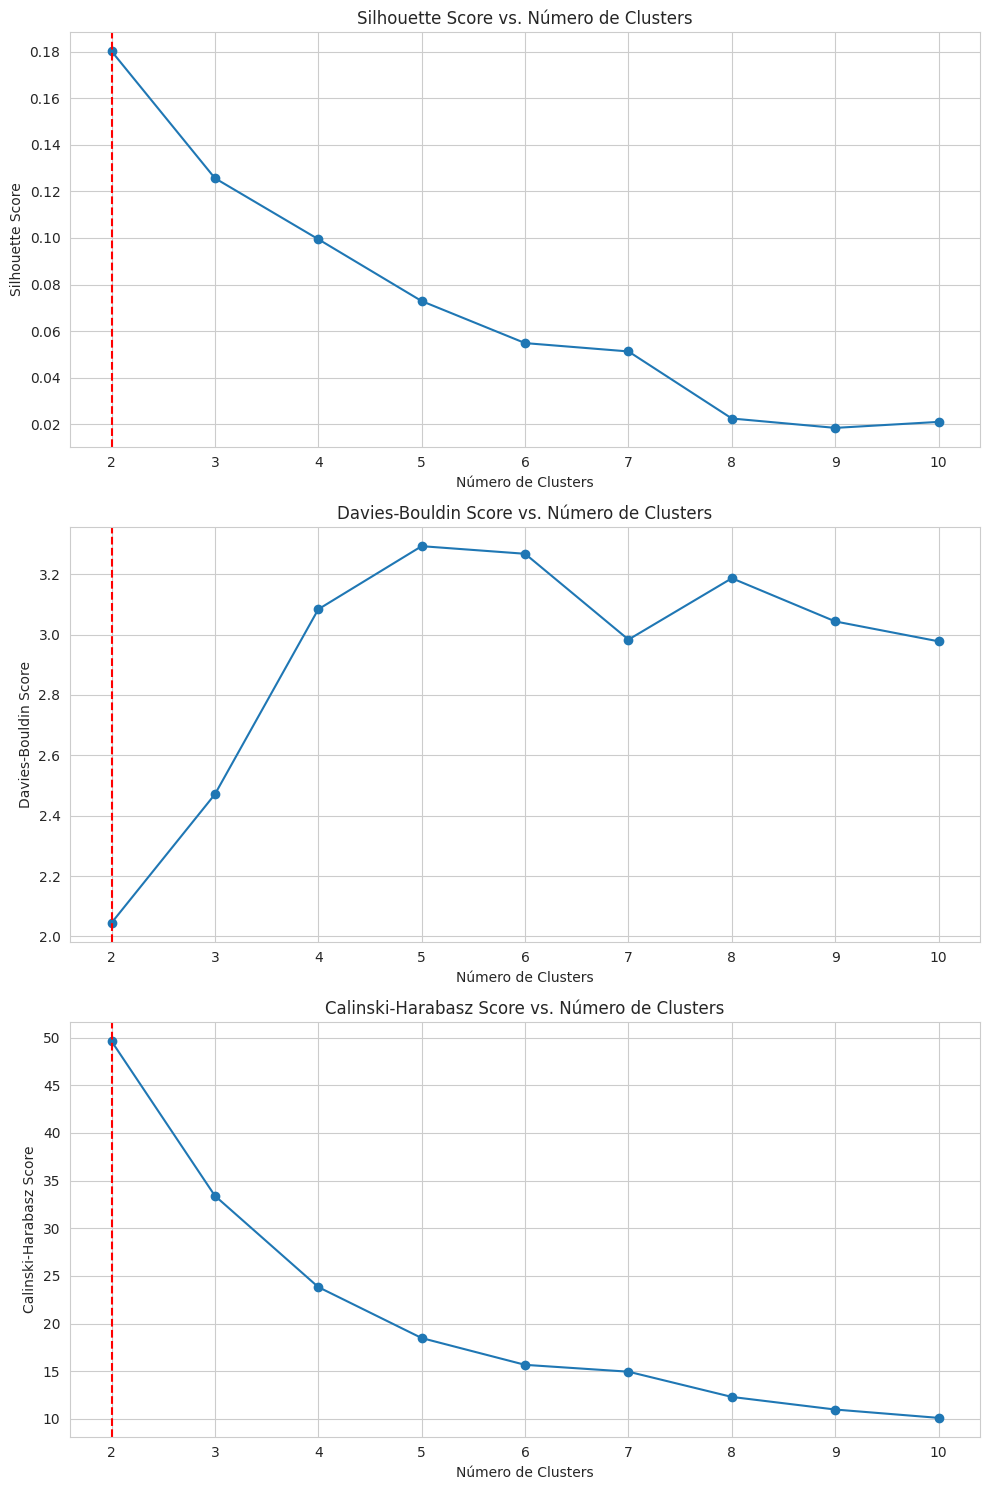

In [26]:
# Rango de número de clusters a evaluar
cluster_range = range(2, 11)

# Inicializar listas para almacenar los puntajes de cada métrica
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Evaluar los clusters para cada número de clusters en el rango especificado
for n_clusters in cluster_range:
    # Inicializar y ajustar el modelo K-medoids
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(X_to_cluster)

    # Calcular las métricas para K-medoids
    silhouette_avg = silhouette_score(X_to_cluster, kmedoids_labels)
    davies_bouldin = davies_bouldin_score(X_to_cluster, kmedoids_labels)
    calinski_harabasz = calinski_harabasz_score(X_to_cluster, kmedoids_labels)

    # Almacenar los resultados
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)

# Encontrar el número óptimo de clusters para cada métrica
optimal_silhouette_clusters = cluster_range[np.argmax(silhouette_scores)]
optimal_davies_bouldin_clusters = cluster_range[np.argmin(davies_bouldin_scores)]
optimal_calinski_harabasz_clusters = cluster_range[np.argmax(calinski_harabasz_scores)]

print(f"El número óptimo de clusters según el Silhouette Score es: {optimal_silhouette_clusters}")
print(f"El número óptimo de clusters según el Davies-Bouldin Score es: {optimal_davies_bouldin_clusters}")
print(f"El número óptimo de clusters según el Calinski-Harabasz Score es: {optimal_calinski_harabasz_clusters}")

# Graficar las métricas para visualizar el número óptimo de clusters
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(cluster_range, silhouette_scores, marker='o')
ax[0].set_title('Silhouette Score vs. Número de Clusters')
ax[0].set_xlabel('Número de Clusters')
ax[0].set_ylabel('Silhouette Score')
ax[0].axvline(x=optimal_silhouette_clusters, color='r', linestyle='--')

ax[1].plot(cluster_range, davies_bouldin_scores, marker='o')
ax[1].set_title('Davies-Bouldin Score vs. Número de Clusters')
ax[1].set_xlabel('Número de Clusters')
ax[1].set_ylabel('Davies-Bouldin Score')
ax[1].axvline(x=optimal_davies_bouldin_clusters, color='r', linestyle='--')

ax[2].plot(cluster_range, calinski_harabasz_scores, marker='o')
ax[2].set_title('Calinski-Harabasz Score vs. Número de Clusters')
ax[2].set_xlabel('Número de Clusters')
ax[2].set_ylabel('Calinski-Harabasz Score')
ax[2].axvline(x=optimal_calinski_harabasz_clusters, color='r', linestyle='--')

plt.tight_layout()
plt.show()

Hacemos la misma comparación para el data set descompuesto en sus componentes principales

El número óptimo de clusters según el Silhouette Score es: 4
El número óptimo de clusters según el Davies-Bouldin Score es: 4
El número óptimo de clusters según el Calinski-Harabasz Score es: 4


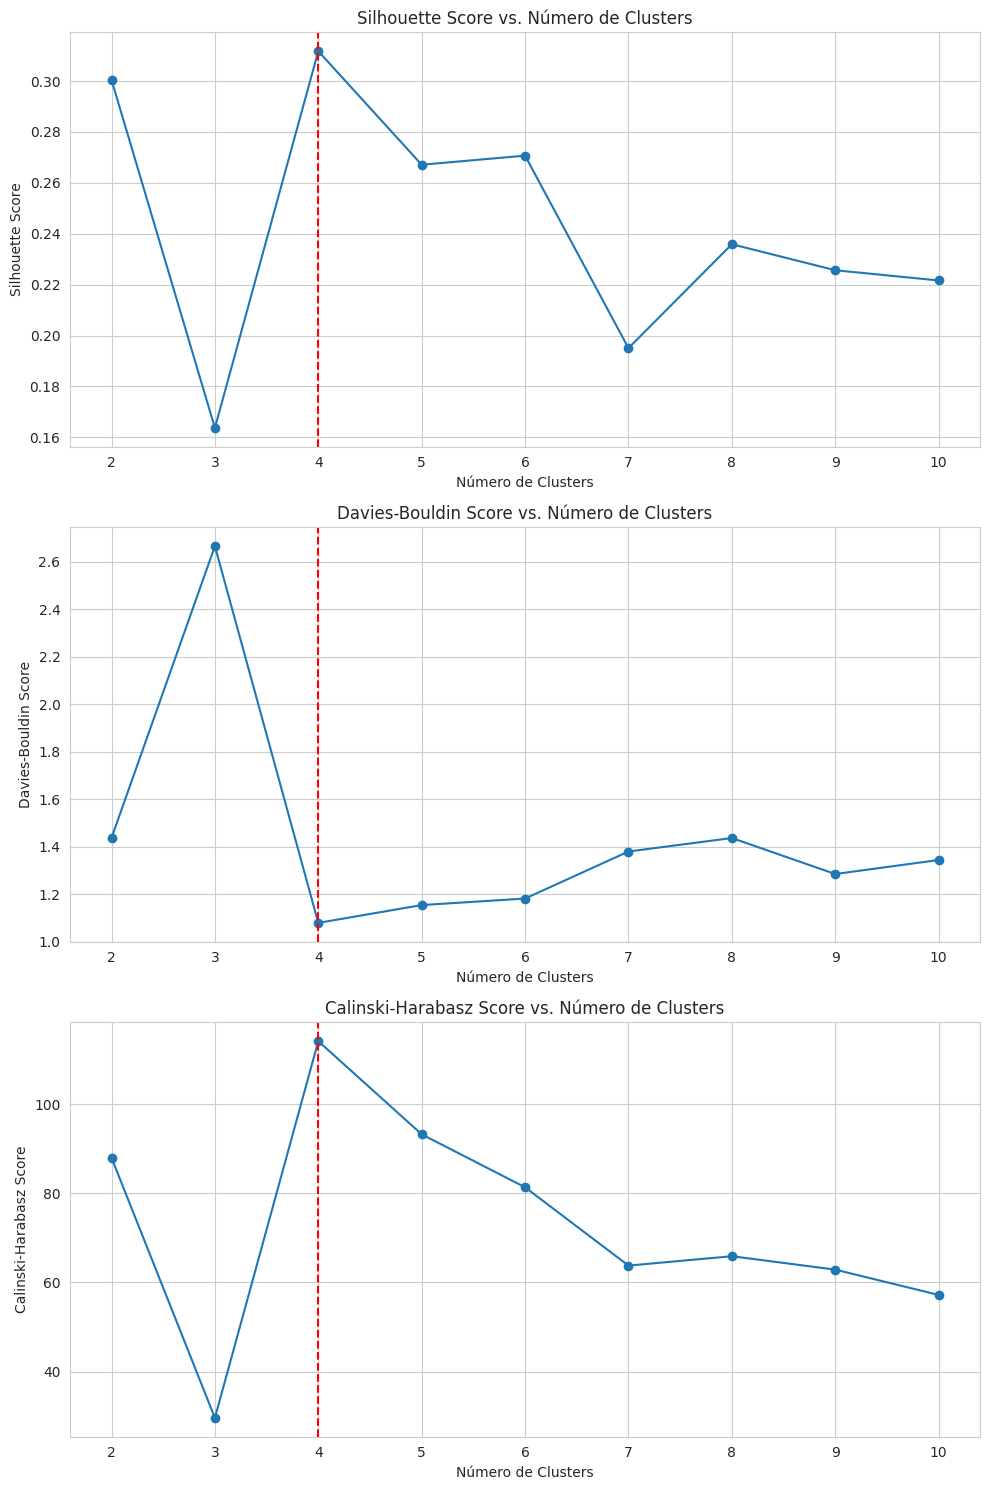

In [27]:
# Rango de número de clusters a evaluar
cluster_range = range(2, 11)

# Inicializar listas para almacenar los puntajes de cada métrica
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Evaluar los clusters para cada número de clusters en el rango especificado
for n_clusters in cluster_range:
    # Inicializar y ajustar el modelo K-medoids
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(X_pca)

    # Calcular las métricas para K-medoids
    silhouette_avg = silhouette_score(X_pca, kmedoids_labels)
    davies_bouldin = davies_bouldin_score(X_pca, kmedoids_labels)
    calinski_harabasz = calinski_harabasz_score(X_pca, kmedoids_labels)

    # Almacenar los resultados
    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    calinski_harabasz_scores.append(calinski_harabasz)

# Encontrar el número óptimo de clusters para cada métrica
optimal_silhouette_clusters = cluster_range[np.argmax(silhouette_scores)]
optimal_davies_bouldin_clusters = cluster_range[np.argmin(davies_bouldin_scores)]
optimal_calinski_harabasz_clusters = cluster_range[np.argmax(calinski_harabasz_scores)]

print(f"El número óptimo de clusters según el Silhouette Score es: {optimal_silhouette_clusters}")
print(f"El número óptimo de clusters según el Davies-Bouldin Score es: {optimal_davies_bouldin_clusters}")
print(f"El número óptimo de clusters según el Calinski-Harabasz Score es: {optimal_calinski_harabasz_clusters}")

# Graficar las métricas para visualizar el número óptimo de clusters
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(cluster_range, silhouette_scores, marker='o')
ax[0].set_title('Silhouette Score vs. Número de Clusters')
ax[0].set_xlabel('Número de Clusters')
ax[0].set_ylabel('Silhouette Score')
ax[0].axvline(x=optimal_silhouette_clusters, color='r', linestyle='--')

ax[1].plot(cluster_range, davies_bouldin_scores, marker='o')
ax[1].set_title('Davies-Bouldin Score vs. Número de Clusters')
ax[1].set_xlabel('Número de Clusters')
ax[1].set_ylabel('Davies-Bouldin Score')
ax[1].axvline(x=optimal_davies_bouldin_clusters, color='r', linestyle='--')

ax[2].plot(cluster_range, calinski_harabasz_scores, marker='o')
ax[2].set_title('Calinski-Harabasz Score vs. Número de Clusters')
ax[2].set_xlabel('Número de Clusters')
ax[2].set_ylabel('Calinski-Harabasz Score')
ax[2].axvline(x=optimal_calinski_harabasz_clusters, color='r', linestyle='--')

plt.tight_layout()
plt.show()

Realizamos una segunda visualización y evaluación de los datos utilizando 4 agrupaciones (clusters).



In [28]:
#Realizar agrupamiento KMedoids en los datos en "X_to_cluster" y añadir las etiquetas de cluster a los datos originales
num_clusters = 4
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)

clusters = kmedoids.fit_predict(X_to_cluster)

X_to_cluster['Cluster'] = clusters

In [29]:
#Calcular la media de cada característica para cada cluster
X_to_cluster.groupby("Cluster").mean()

,"Estado mental (p. ej., claridad, atención y memoria).","Estado de ánimo y comportamiento (p. ej., depresión, motivación).",Actividad del día a día y comportamiento.,Motivación/Iniciativa.,Apatia,Control de emocional,Problema de sueño,Somnolencia diurna,Presencia de temblor,Dificultades para levantarse,Problemas con marcha y equilibrio,Congelación al caminar,Lenguaje,Expresión facial,Rigidez - Cuello,Rigidez - MSD,Rigidez - MSI,Rigidez - MID,Rigidez - MII,Golpeteo de dedos (tapping) - Mano derecha,Golpeteo de dedos (tapping) - Mano izquierda,Movimientos de las manos - Mano derecha,Movimientos de las manos - Mano izquierda,Pronación-supinación - Mano derecha,Pronación-supinación - Mano izquierda,Golpeteo con los dedos de los pies - Pie derecho,Golpeteo con los dedos de los pies - Pie izquierdo,Agilidad con las piernas - Pierna derecha,Agilidad con las piernas - Pierna izquierda,Levantarse de la silla,Marcha,Congelación de la marcha,Estabilidad postural,Postura,Espontaneidad global de movimientos,Temblor postural - Mano derecha,Temblor postural - Mano izquierda,Temblor de acción - Mano derecha,Temblor de acción - Mano izquierda,Amplitud del temblor de reposo - MSD,Amplitud del temblor de reposo - MSI,Amplitud del temblor de reposo - MID,Amplitud del temblor de reposo - MII,Amplitud del temblor de reposo - Labio/mandíbula,Persistencia del temblor de reposo,proporcion_sintomas_no_motores,proporcion_sintomas_fisicos,proporcion_sintomas_motores
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.564516,0.274194,0.887097,0.854839,0.693548,0.274194,0.693548,0.725806,0.919355,0.838710,0.887097,0.677419,0.741935,0.951613,0.887097,0.951613,0.919355,0.967742,0.887097,0.967742,0.935484,0.935484,0.935484,0.919355,0.935484,0.951613,0.951613,0.903226,0.887097,0.741935,0.903226,0.661290,0.887097,0.870968,0.919355,0.806452,0.854839,0.774194,0.741935,0.870968,0.887097,0.790323,0.838710,0.596774,0.870968,0.620968,0.830645,0.868035
1,0.111111,0.138889,0.083333,0.083333,0.111111,0.083333,0.583333,0.527778,0.916667,0.638889,0.750000,0.583333,0.527778,0.750000,0.694444,0.888889,0.805556,0.861111,0.777778,0.861111,0.888889,0.833333,0.833333,0.861111,0.888889,0.833333,0.833333,0.833333,0.833333,0.638889,0.861111,0.694444,0.722222,0.722222,0.805556,0.888889,0.916667,0.805556,0.833333,0.944444,0.916667,0.805556,0.750000,0.444444,0.694444,0.215278,0.722222,0.795455
2,0.533333,0.066667,0.233333,0.300000,0.033333,0.133333,0.233333,0.100000,0.733333,0.533333,0.600000,0.333333,0.533333,0.733333,0.700000,0.866667,0.866667,0.733333,0.733333,0.900000,0.833333,0.800000,0.833333,0.833333,0.800000,0.766667,0.866667,0.766667,0.833333,0.600000,0.866667,0.433333,0.800000,0.766667,0.833333,0.466667,0.433333,0.133333,0.233333,0.766667,0.866667,0.533333,0.633333,0.200000,0.666667,0.204167,0.550000,0.685859
3,0.402174,0.195652,0.673913,0.717391,0.510870,0.217391,0.576087,0.695652,0.478261,0.608696,0.717391,0.500000,0.695652,0.836957,0.652174,0.782609,0.750000,0.750000,0.750000,0.782609,0.760870,0.771739,0.750000,0.728261,0.750000,0.771739,0.804348,0.826087,0.750000,0.630435,0.869565,0.576087,0.695652,0.750000,0.782609,0.152174,0.086957,0.130435,0.141304,0.141304,0.076087,0.076087,0.054348,0.076087,0.152174,0.498641,0.576087,0.554677


In [30]:
# Crear tres nuevas columnas en el DataFrame "X_to_cluster" donde se calcula la media de las características correspondientes
X_to_cluster["proporcion_sintomas_no_motores"] = X_to_cluster[updrs["UPDRS1"]].mean(axis=1)
X_to_cluster["proporcion_sintomas_fisicos"] = X_to_cluster[updrs["UPDRS2"]].mean(axis=1)
X_to_cluster["proporcion_sintomas_motores"] = X_to_cluster[updrs["UPDRS3"]].mean(axis=1)

In [31]:
#Añadir las etiquetas de cluster al DataFrame "X_pca" como una nueva columna llamada “cluster”. Las etiquetas de cluster se obtuvieron de la predicción del modelo KMedoids en el código anterior.
X_pca["cluster"] = clusters

In [32]:
#Agrupar la columna Cluster y calcular la media de las tres columnas mencionadas para cada grupo
X_to_cluster.groupby("Cluster")[["proporcion_sintomas_no_motores", "proporcion_sintomas_fisicos", "proporcion_sintomas_motores"]].mean()

,proporcion_sintomas_no_motores,proporcion_sintomas_fisicos,proporcion_sintomas_motores
Cluster,,,
0,0.620968,0.830645,0.868035
1,0.215278,0.722222,0.795455
2,0.204167,0.550000,0.685859
3,0.498641,0.576087,0.554677


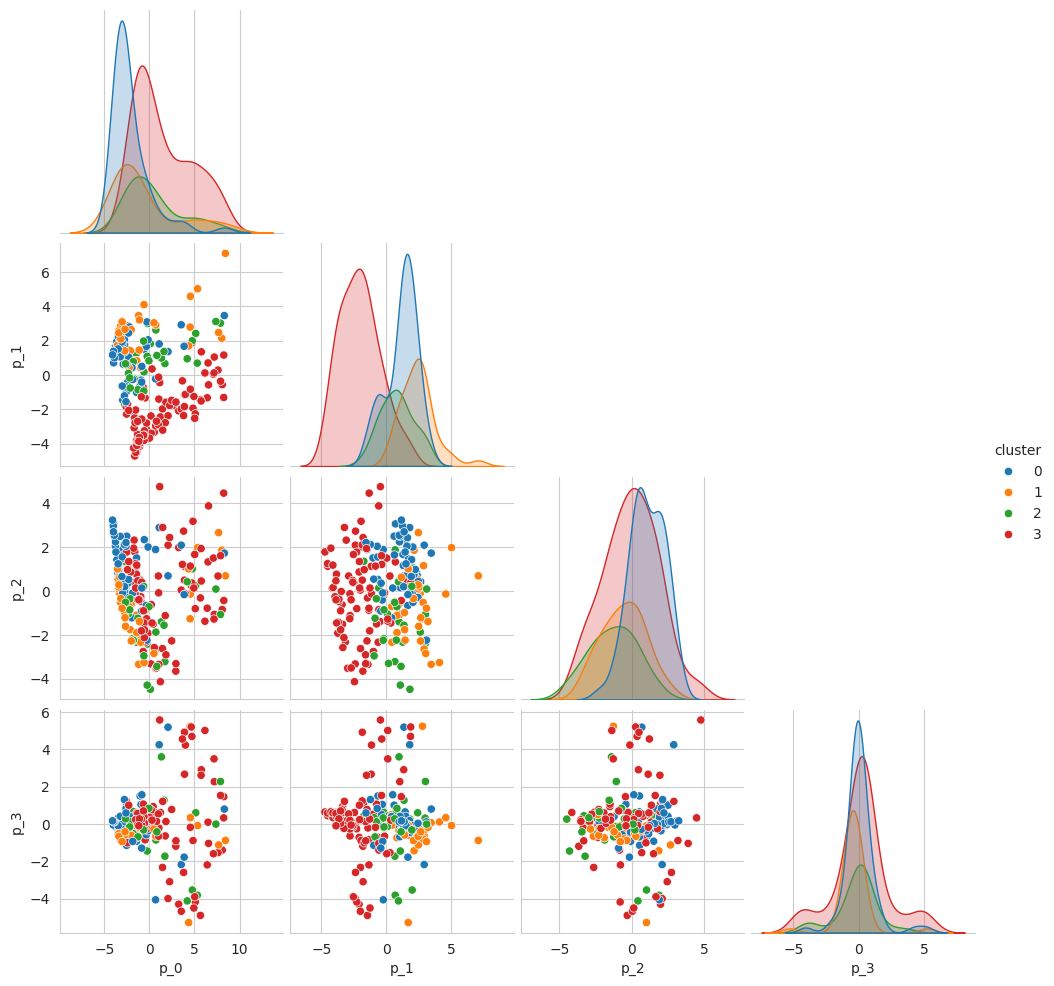

In [33]:
#Generar un grafico de pares con los clusters identificados anteriormente
sns.pairplot(X_pca, corner=True, hue="cluster", palette="tab10");

In [34]:
num_clusters = 4
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)

clusters = kmedoids.fit_predict(X_to_cluster)

X_to_cluster['Cluster'] = clusters

In [35]:
# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(X, clusters)

# Calcular el coeficiente de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X, clusters)

# Calcular el coeficiente de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(X, clusters)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Silhouette Score: 0.067654168947459
Davies-Bouldin Score: 2.9390072358650476
Calinski-Harabasz Score: 20.10305094480641


No observamos una mejora considerable entre 4 y 3 clusters.